# <font color = green> *Part 1* </font>
#### <font color = blue> *EDA & Data Preprocessing on Google App Store Rating dataset.* </font>

#### 1. Import required libraries and read the dataset.

In [18]:
# Importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
# Loading Dataset
df = pd.read_csv("Apps_data.csv")

#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [20]:
# Top 5 rows
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
# checking shape of dataset
# Dataset having 10841 rows and 13 columns.
df.shape

(10841, 13)

In [22]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- Only "Rating" column is of "float" datatype.
- Remainging are of "object" datatype.
- There are also missing values present in some columns. 

#### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [23]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [24]:
df.describe(include = "object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


##### <font color = "blue">*The columns that need to be worked upon for model building are :*</font>
- Size
- Installs
- Type
- Price
- Content Rating
- Reviews
- Rating

#### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [25]:
# Checking for duplicate records in dataset.
df.duplicated().sum()

483

In [26]:
# There are 483 duplicate rows found.
# Dropping duplicates.
df.drop_duplicates(inplace = True)

In [27]:
# No duplicates reamining.
df.duplicated().sum()

0

#### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [28]:
# Checking uniques categories of column category
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [29]:
# "1.9" is invalid category of this column.
df[df["Category"]=="1.9"].index

Index([10472], dtype='int64')

In [30]:
# Dropping the invalid category.
df.drop(index=10472,inplace = True)

In [31]:
# It is dropped.
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

#### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low).


In [32]:
# Checking for missing values present in column "Rating".
df["Rating"].isnull().sum()

1465

In [33]:
# 1465 missing values present in Rating column. So, dropping them.
df = df.dropna(subset=['Rating'])

In [34]:
df["Rating"].isnull().sum()

0

In [35]:
# create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low).
df["Rating_category"] = df["Rating"].map(lambda x : "high" if x > 3.5 else "low")

In [36]:
df["Rating_category"]

0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 8892, dtype: object

#### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [39]:
# Check the distribution of column 'Rating_category'.
(df['Rating_category'].value_counts()/df["Rating_category"].shape[0])*100

Rating_category
high    90.103464
low      9.896536
Name: count, dtype: float64

#### <font color = "blue">*inference :*</font>
- Almost 90% approximate users rated the apps above 3.5.
- Only 10% approximate users rated the apps below 3.5.

#### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [40]:
# Convert the column "Reviews'' to numeric data type
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="ignore")

In [42]:
# Converted
df["Reviews"].dtypes

dtype('int64')

In [47]:
# Dealing with outliers
# Calculating IQR, Upper bound and Lower bound to find outliers.
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5*IQR

In [48]:
outliers = (np.where((df["Reviews"] > UB) | (df["Reviews"] <LB))[0])
len(outliers)

1555

## 1555 outliers present in Reviews column.

In [50]:
df["Reviews"].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

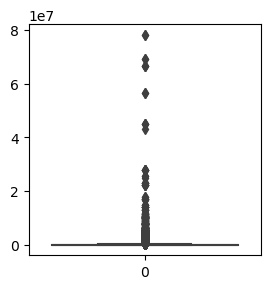

In [51]:
# Box plot before removing outliers
plt.figure(figsize=(3,3))
sns.boxplot(df["Reviews"]);

In [52]:
# Handling outliers with log transformation.
df["Reviews"] = np.log1p(df['Reviews'])

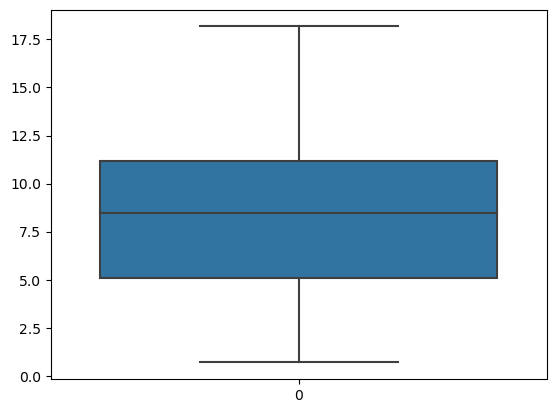

In [53]:
# Box plot after treating outliers.
sns.boxplot(df["Reviews"]);

## From above boxplot it can be noticed that log transformation supressed the outliers.

#### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [54]:
# Searching for rows which contains invalid values in column size.
# "Varies with device is invalid value of column size"
index_size = df[df["Size"]=="Varies with device"].index

In [55]:
# Dropping rows containging invalid values.
df.drop(index = index_size, inplace = True)

In [56]:
# Rows are reduced.
df.shape

(7424, 14)

In [57]:
# Replacing M with 1 million and K with 1000 in column Size.
df["Size"] = df["Size"].replace({"M" : "*1000000", "k" : "*1000"},regex = True).map(eval)

In [59]:
# Replaced
df["Size"]

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

#### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [60]:
# Treating unwanted characters in column "Installs" like removing "," , "+" and converting column into int datatype.
df["Installs"] = df["Installs"].str.replace(",","").str.replace("+","").astype("int")

In [61]:
df["Installs"].value_counts()

Installs
1000000       1230
100000        1003
10000          949
10000000       762
1000           675
5000000        493
500000         471
50000          432
5000           414
100            297
500            195
100000000      192
50000000       144
10              67
50              56
500000000       24
5                9
1000000000       8
1                3
Name: count, dtype: int64

#### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [62]:
# Removing $ from price and converting its data type to float.
df["Price"] = df["Price"].str.replace("$", "").astype("float")

In [63]:
# Done
df["Price"].value_counts()

Price
0.00      6877
0.99       104
2.99        98
4.99        61
1.99        53
          ... 
6.49         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: count, Length: 68, dtype: int64

#### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [64]:
# Dropping the column which are not suitable for analysis.
drop_columns = ['Rating', 'App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
df.drop(columns=drop_columns, inplace=True)
df.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,high


#### 13. Encode the categorical columns.

#### creating two datasets one having only numeric columns and other having only categorical columns. 

In [65]:
# df_num having only numeric columns.
df_num = df.select_dtypes(exclude = "object")

In [66]:
# Reseting its index
df_num.reset_index(drop = True, inplace = True)

In [67]:
# df_cat having only categorical columns.
df_cat = df.select_dtypes(include = "object")

In [68]:
# Encoding the Categorical columns by sklearn ordinal encoder.
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(df_cat)
df_cat = pd.DataFrame(oe.transform(df_cat), columns = df_cat.columns)
df_cat

,Category,Type,Content Rating,Rating_category
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,4.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
7419,3.0,0.0,1.0,0.0
7420,11.0,0.0,1.0,0.0
7421,11.0,0.0,1.0,0.0
7422,11.0,0.0,1.0,0.0


In [69]:
# Now concatinating both df_num and df_cat.
df1 = pd.concat((df_num, df_cat), axis = 1)

In [70]:
df1

,Reviews,Size,Installs,Price,Category,Type,Content Rating,Rating_category
0,5.075174,19000000.0,10000,0.0,0.0,0.0,1.0,0.0
1,6.875232,14000000.0,500000,0.0,0.0,0.0,1.0,0.0
2,11.379520,8700000.0,5000000,0.0,0.0,0.0,1.0,0.0
3,12.281389,25000000.0,50000000,0.0,0.0,0.0,4.0,0.0
4,6.875232,2800000.0,100000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
7419,3.806662,619000.0,1000,0.0,3.0,0.0,1.0,0.0
7420,2.079442,2600000.0,500,0.0,11.0,0.0,1.0,0.0
7421,3.663562,53000000.0,5000,0.0,11.0,0.0,1.0,0.0
7422,1.609438,3600000.0,100,0.0,11.0,0.0,1.0,0.0


#### 14. Segregate the target and independent features (Hint: Use Rating_category as the target).

In [71]:
# Segregate the target and independent features.
X = df1.drop(columns = "Rating_category")
y = df1[["Rating_category"]]

In [72]:
X,y

(        Reviews        Size  Installs  Price  Category  Type  Content Rating
 0      5.075174  19000000.0     10000    0.0       0.0   0.0             1.0
 1      6.875232  14000000.0    500000    0.0       0.0   0.0             1.0
 2     11.379520   8700000.0   5000000    0.0       0.0   0.0             1.0
 3     12.281389  25000000.0  50000000    0.0       0.0   0.0             4.0
 4      6.875232   2800000.0    100000    0.0       0.0   0.0             1.0
 ...         ...         ...       ...    ...       ...   ...             ...
 7419   3.806662    619000.0      1000    0.0       3.0   0.0             1.0
 7420   2.079442   2600000.0       500    0.0      11.0   0.0             1.0
 7421   3.663562  53000000.0      5000    0.0      11.0   0.0             1.0
 7422   1.609438   3600000.0       100    0.0      11.0   0.0             1.0
 7423  12.894981  19000000.0  10000000    0.0      18.0   0.0             1.0
 
 [7424 rows x 7 columns],
       Rating_category
 0           

#### 15. Split the dataset into train and test.

In [73]:
# Split the dataset into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)

#### 16. Standardize the data, so that the values are within a particular range.

In [82]:
# Standardizing the data by sklearn MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train)) 
X_test_scaled = pd.DataFrame(scaler.transform(X_test)) 
X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns

In [83]:
X_train_scaled

,Reviews,Size,Installs,Price,Category,Type,Content Rating
0,0.453198,0.239916,4.999900e-05,0.0,0.37500,0.0,0.2
1,0.129808,0.023893,9.990000e-07,0.0,0.78125,0.0,0.2
2,0.302539,0.006651,9.999000e-06,0.0,0.59375,0.0,0.2
3,0.544860,0.469942,4.999999e-03,0.0,0.81250,0.0,0.2
4,0.633298,0.058896,4.999999e-03,0.0,0.09375,0.0,0.2
...,...,...,...,...,...,...,...
5563,0.528844,0.021892,9.999990e-04,0.0,0.18750,0.0,0.2
5564,0.608893,0.077899,4.999999e-03,0.0,0.43750,0.0,0.2
5565,0.707994,0.269920,5.000000e-02,0.0,0.43750,0.0,0.8
5566,0.064904,0.017892,4.000000e-09,0.0,0.84375,0.0,0.2


                                    End
----------------------------------------------------------------